# Examples

Here's some examples of using the **antimeridian** package on some artificial and real-world data.

## Test cases

Our test suite exercises the antimeridian algorithm in a variety of ways.
Here, we visualize some our test cases in two projections.

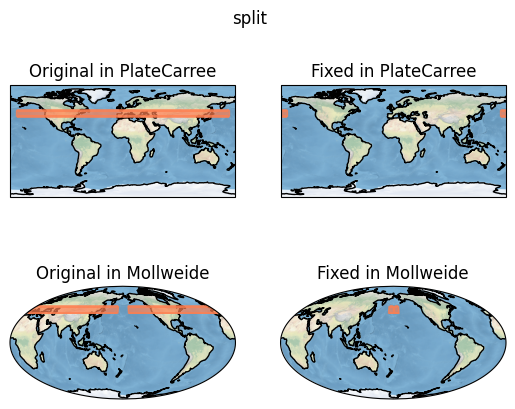

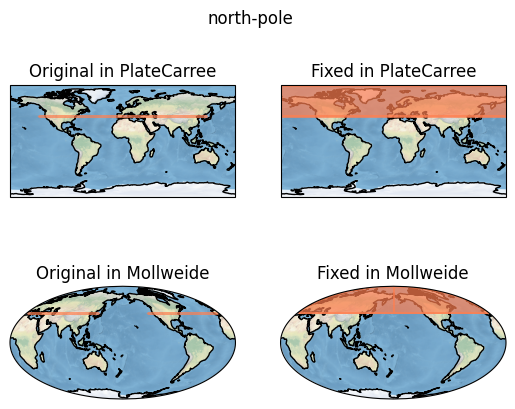

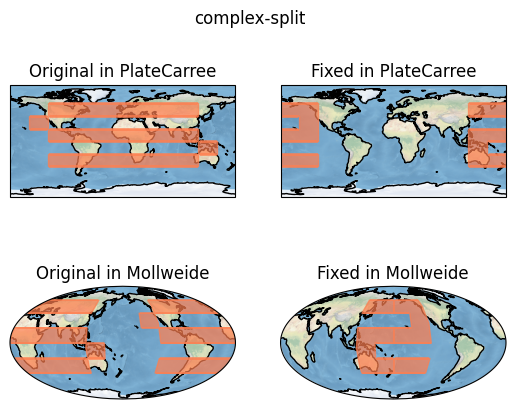

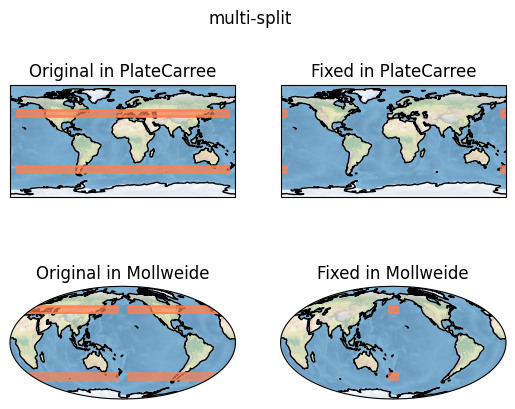

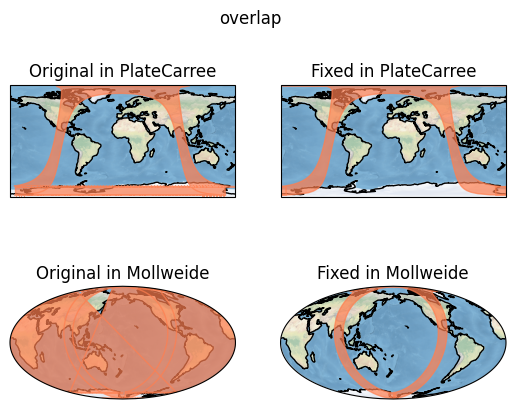

In [1]:
import json
import warnings
from pathlib import Path
from typing import Any, Dict, Optional

import shapely.geometry
from cartopy.crs import Mollweide, PlateCarree
from cartopy.io import DownloadWarning
from matplotlib import pyplot

import antimeridian

warnings.filterwarnings("ignore", category=DownloadWarning)


def read_json(path: Path) -> Dict[str, Any]:
    with open(path) as f:
        return json.load(f)


def plot(name: str, fix_winding: bool = True, suptitle: Optional[str] = None) -> None:
    data = read_json(f"../tests/data/input/{name}.json")
    input = shapely.geometry.shape(data)
    output = shapely.geometry.shape(
        antimeridian.fix_geojson(data, fix_winding=fix_winding)
    )

    if suptitle is None:
        suptitle = name

    figure = pyplot.figure()
    figure.suptitle(suptitle)

    axes = figure.add_subplot(2, 2, 1, projection=PlateCarree())
    axes.set_title("Original in PlateCarree")
    axes.stock_img()
    axes.coastlines()
    axes.add_geometries(input, crs=PlateCarree(), color="coral", alpha=0.7)

    axes = figure.add_subplot(2, 2, 2, projection=PlateCarree())
    axes.set_title("Fixed in PlateCarree")
    axes.stock_img()
    axes.coastlines()
    axes.add_geometries(output, crs=PlateCarree(), color="coral", alpha=0.7)

    axes = figure.add_subplot(2, 2, 3, projection=Mollweide(central_longitude=180))
    axes.set_title("Original in Mollweide")
    axes.stock_img()
    axes.coastlines()
    axes.add_geometries(input, crs=PlateCarree(), color="coral", alpha=0.7)

    axes = figure.add_subplot(2, 2, 4, projection=Mollweide(central_longitude=180))
    axes.set_title("Fixed in Mollweide")
    axes.stock_img()
    axes.coastlines()
    axes.add_geometries(output, crs=PlateCarree(), color="coral", alpha=0.7)

    pyplot.show()


for name in [
    "split",
    "north-pole",
    "complex-split",
    "multi-split",
    "overlap",
]:
    plot(name)

## Winding order

The exterior ring of a GeoJSON Polygon _should_ be wound counter-clockwise.
Taken literally, this means that a clockwise-wound polygon would be a hole in a large polygon that encloses both poles.
However, in practice, it is common for polygons to be wound incorrectly (e.g. [#29](https://github.com/gadomski/antimeridian/issues/29) and [#32](https://github.com/gadomski/antimeridian/issues/32)).
Our package therefore defaults to correcting the winding order to be counter-clockwise, and only creates these pole-encompassing polygons if explicitly asked.

Most GIS software will automatically fix clockwise exterior polygons, and so it can be hard to know if your Polygon is wound correctly without inspecting the points themselves.

/Users/gadomski/Code/gadomski/antimeridian/src/antimeridian/_implementation.py:594: FixWindingWarning: The exterior ring of this shape is wound clockwise. Since this is a common error in real-world geometries, this package is reversing the exterior coordinates of the input shape before running its algorithm. If you know that your input shape is correct (i.e. if your data encompasses both poles), pass `fix_winding=False`.
  FixWindingWarning.warn()


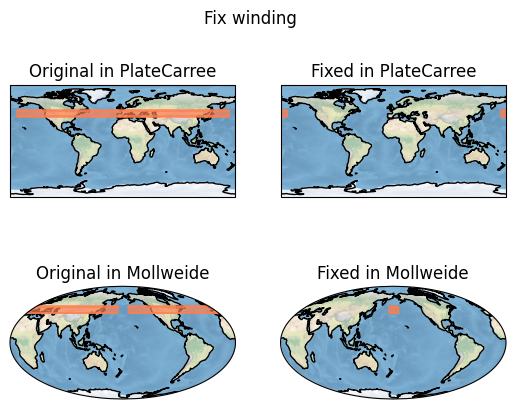

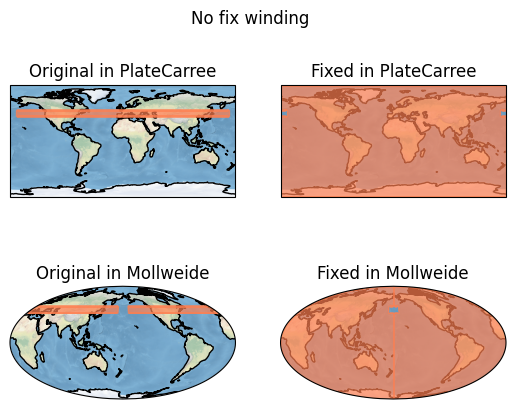

In [2]:
plot("cw-split", fix_winding=True, suptitle="Fix winding")
plot("cw-split", fix_winding=False, suptitle="No fix winding")